In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [5]:
df = pd.read_csv("Heart_Disease_Prediction.csv")

In [12]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [15]:
df["Heart Disease"].value_counts()

Absence     150
Presence    120
Name: Heart Disease, dtype: int64

C:\Users\harrisst\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


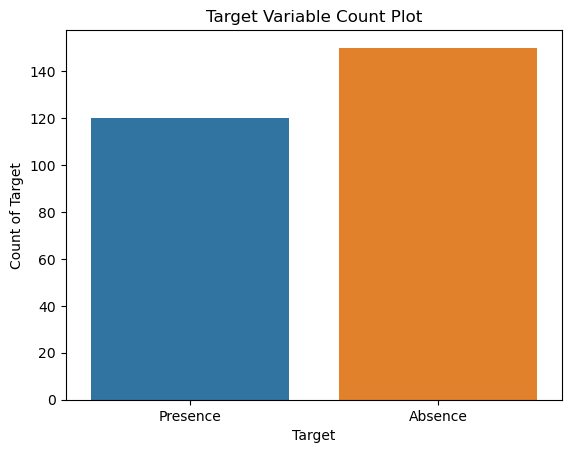

In [16]:
sns.countplot(df["Heart Disease"])
plt.xlabel("Target")
plt.ylabel("Count of Target")
plt.title("Target Variable Count Plot")
plt.show()

In [25]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state = 99)

In [63]:
clf = RandomForestClassifier(criterion = "gini", max_depth = 8, min_samples_split = 10, random_state = 5)

In [64]:
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=5)

In [65]:
clf.feature_importances_

array([0.07454632, 0.02870253, 0.1356585 , 0.05290484, 0.04986793,
       0.00316552, 0.00840318, 0.0792314 , 0.05398226, 0.08253997,
       0.06936824, 0.16910191, 0.1925274 ])

In [66]:
y_pred = clf.predict(X_test)

In [67]:
confusion_matrix(y_test,y_pred)

array([[32,  8],
       [ 8, 20]], dtype=int64)

In [68]:
accuracy_score(y_test,y_pred)

0.7647058823529411

In [69]:
cross_val_score(clf,X_train,y_train,cv=10)

array([0.9047619 , 0.85714286, 0.9       , 0.95      , 0.85      ,
       0.65      , 0.9       , 0.8       , 0.8       , 0.95      ])

In [70]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

     Absence       0.80      0.80      0.80        40
    Presence       0.71      0.71      0.71        28

    accuracy                           0.76        68
   macro avg       0.76      0.76      0.76        68
weighted avg       0.76      0.76      0.76        68



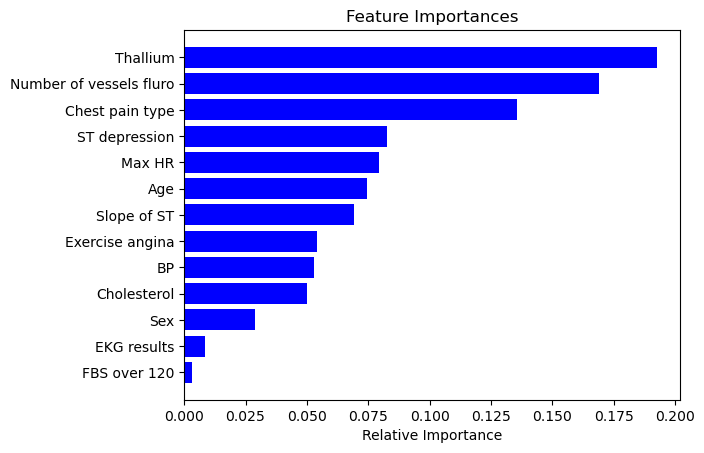

In [71]:
features = df.columns
importances = clf.feature_importances_
indicies = np.argsort(importances)

plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color='b',align = 'center')
plt.yticks(range(len(indices)),[features[i] for i in indicies])
plt.xlabel('Relative Importance')
plt.show()